In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# New Section

# New Section

In [ ]:
link='https://drive.google.com/file/d/14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV/view?usp=sharing'

In [ ]:
fluff, id = link.split('=')
id = '14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV'
print (id) # Verify that you have everything after '='

14s44-xik0NjVtc2R8Gxj6jdI-JE64ysV


In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('corona_tweets_01.csv')  
dataframe=pd.read_csv("corona_tweets_01.csv", header=None)

In [ ]:
dataframe=pd.DataFrame(dataframe[0])

In [ ]:
dataframe.to_csv("ready_corona_tweets_01.txt", index=False, header=None)
dataframe

,0
0,1240727808080412673
1,1240727808005079041
2,1240727808340414464
3,1240727808629813248
4,1240727808617230336
...,...
831322,1240861453524930562
831323,1240861453554315265
831324,1240861453503959043
831325,1240861453311070209


In [ ]:
pip install twarc

In [ ]:
accesstoken='1427751738-lXHLG1ocIx0K83p5OKuqfmfnbtugZn4n1S1GzA7'
accesstokenkey='EcTbXH6bYC2nJEyZGXEakfJiPcFixdS2i4txSYx2cXE0f'
apikey='6iaCc1iamER8NdvOCApHMN7Io'
apisecretkey='qKZ7jnoHFYzhZdgxku1dWAAgTQfUhvMOK40x4L0yy98BRPwYow'

In [ ]:
from twarc import Twarc

In [ ]:
t = Twarc(apikey, apisecretkey, accesstoken, accesstokenkey)

In [ ]:
list_tweets=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  if(x==100):
    break;
  list_tweets.append(tweet['full_text'])

In [ ]:
list_tweets

['Wuhan has been in complete quarantine for over 8 weeks. \n\nPeople here are still going about their daily lives as normal. \n\nThis is pure fantasy. https://t.co/AUZbGNRDjM',
 'RT @chandlerriggs: here’s a deleted scene from TWD’s special on corona virus https://t.co/qGuSfyjpK5',
 "RT @RedTRaccoon: You can no longer defend this.\n\nMake up any excuse or reasoning you want, it's intentional and it's racist.",
 'Pretty much any corona virus germ that wants to or has entered my body these passed hours are all being bodied by these shots of henny https://t.co/HLsSEnRksu',
 'RT @RealSaavedra: Good.\n\nIt came from China.',
 'RT @nicolebyer: Everyone in this looks sick',
 'RT @jabinbotsford: Close up of President @realDonaldTrump notes is seen where he crossed out "Corona" and replaced it with "Chinese" Virus…',
 'RT @Biancaixvi: Corona day 3: it just feels like Sunday again and...again',
 'RT @FernandoAmandi: China’s irresponsible and criminal behavior in the wake of COVID-19 will leave it

In [ ]:
# Create a function to clean the tweets
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text.encode('ascii', 'ignore').decode('ascii')
    return regrex_pattern.sub(r'',text)

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n', '', text) #REmoving Marks
 text = re.sub(':', '', text) #REmoving Marks
 text = re.sub('_', '', text) #REmoving Marks
 
 text=deEmojify(text)
 return text



list_tweets=list(map(cleanTxt,list_tweets))

In [ ]:
list_tweets_final=[]
for x,tweet in enumerate(t.hydrate(open('ready_corona_tweets_01.txt'))):
  list_tweets_final.append(tweet['full_text'])

KeyboardInterrupt: ignored

In [ ]:
list_tweets_final=list(map(cleanTxt,list_tweets_final))

In [ ]:
data_tweets=pd.DataFrame(list_tweets_final,columns=["Tweets"])

In [ ]:
data_tweets.head()

,Tweets
0,Wuhan has been in complete quarantine for over...
1,here’s a deleted scene from TWD’s special on ...
2,You can no longer defend this.Make up any exc...
3,Pretty much any corona virus germ that wants t...
4,Good.It came from China.


In [ ]:
data_tweets.to_csv("data_1.csv", index=False, header=None)

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data_tweets['Subjectivity'] = data_tweets['Tweets'].apply(getSubjectivity)
data_tweets['Polarity'] = data_tweets['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data_tweets


,Tweets,Subjectivity,Polarity
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667
4,Good.It came from China.,0.000000,0.000000
...,...,...,...
57469,"Photo of briefing papers from today shows ""c...",0.000000,0.000000
57470,Can everyone just stay at home please so that...,0.500000,0.366667
57471,The only place your going to see rice is t...,1.000000,0.000000
57472,what should I say here....,0.000000,0.000000


In [ ]:
reviews = np.array(data_tweets['Tweets'])


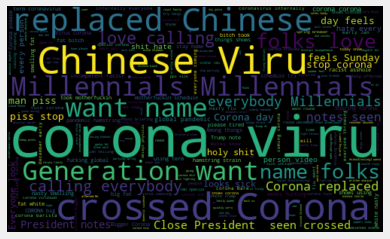

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in data_tweets['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data_tweets['Analysis'] = data_tweets['Polarity'].apply(getAnalysis)
# Show the dataframe
data_tweets


,Tweets,Subjectivity,Polarity,Analysis
0,Wuhan has been in complete quarantine for over...,0.387500,0.116071,Positive
1,here’s a deleted scene from TWD’s special on ...,0.571429,0.357143,Positive
2,You can no longer defend this.Make up any exc...,0.050000,-0.050000,Negative
3,Pretty much any corona virus germ that wants t...,0.433333,0.216667,Positive
4,Good.It came from China.,0.000000,0.000000,Neutral
...,...,...,...,...
57469,"Photo of briefing papers from today shows ""c...",0.000000,0.000000,Neutral
57470,Can everyone just stay at home please so that...,0.500000,0.366667,Positive
57471,The only place your going to see rice is t...,1.000000,0.000000,Neutral
57472,what should I say here....,0.000000,0.000000,Neutral


In [ ]:
labels=np.array(data_tweets['Analysis'])


In [ ]:
data_tweets['Tweets'].loc[1]
data_tweets['Analysis'].loc[1]

'Positive'

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(data_tweets["Polarity"][i], data_tweets["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

In [ ]:
# Print the percentage of positive tweets
ptweets = data_tweets[data_tweets.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / data_tweets.shape[0]) * 100 , 1)

27.9

In [ ]:
# Print the percentage of negative tweets
ntweets = data_tweets[data_tweets.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / data_tweets.shape[0]) * 100, 1)

27.1

In [ ]:
# Show the value counts
data_tweets['Analysis'].value_counts()

Neutral     25875
Positive    16035
Negative    15564
Name: Analysis, dtype: int64

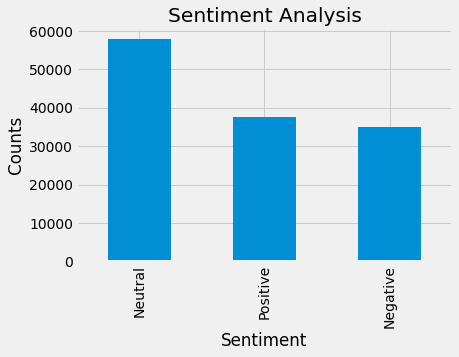

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
import numpy as np
import pandas as pd



In [ ]:

#optional
punctuation = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'
all_reviews = 'separator'.join(reviews)
all_reviews = all_reviews.lower()
all_text = ''.join([c for c in all_reviews if c not in punctuation])

reviews_split = all_text.split('separator')
all_text = ' '.join(reviews_split)
words = all_text.split()

new_reviews = []
for review in reviews_split:
    review = review.split()
    new_text = []
    for word in review:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)
    new_reviews.append(new_text)

In [ ]:
from collections import Counter

Counter(labels)

Counter({'Negative': 15564, 'Neutral': 25875, 'Positive': 16035})

In [ ]:
#dictionary mapping to integer
'''encoding'''
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in new_reviews:
    reviews_ints.append([vocab_to_int[word] for word in review])
    

In [ ]:
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  32030

Tokenized review: 
 [[448, 81, 144, 10, 1736, 265, 16, 137, 108, 60, 183, 18, 230, 159, 91, 132, 900, 723, 62, 1172, 5, 3, 2941, 10559]]


In [ ]:
#labels encoding
encoded_labels = []
for label in labels:
    if label == 'Neutral':
        encoded_labels.append(1)
    elif label == 'Negative':
        encoded_labels.append(0)
    else:
        encoded_labels.append(1)

encoded_labels = np.asarray(encoded_labels)
print (encoded_labels)


[1 1 0 ... 1 1 0]


In [ ]:
#padding 
def pad_features(reviews_ints, seq_length):
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features



seq_length = 15

features = pad_features(reviews_ints, seq_length=seq_length)



NameError: ignored

In [ ]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of the resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(45979, 0) 
Validation set: 	(5747, 0) 
Test set: 		(5748, 0)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE the training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Sample input size:  torch.Size([50, 0])
Sample input: 
 tensor([], size=(50, 0), dtype=torch.int64)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0])
No GPU available, training on CPU.


In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
hidden_dim = 128
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(32031, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
epochs = 10 

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

RuntimeError: ignored